**VISUALIZATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib 
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', 62)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bayes/developer_survey_2020/survey_results_public.csv')

In [4]:
df.shape

(64461, 61)

In [5]:
numeric_cols = [[feature for feature in df if df[feature].dtypes != 'O']]

In [6]:
numeric_cols

[['Respondent', 'Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs']]

In [7]:
numeric_df = df[['Respondent', 'Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs']]

In [8]:
numeric_df.dtypes

Respondent         int64
Age              float64
CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
dtype: object

In [9]:
numeric_df.isnull().sum()

Respondent           0
Age              19015
CompTotal        29635
ConvertedComp    29705
WorkWeekHrs      23310
dtype: int64

In [10]:
numeric_df.describe()

Respondent           Age      CompTotal  ConvertedComp   WorkWeekHrs
count  64461.000000  45446.000000   3.482600e+04   3.475600e+04  41151.000000
mean   32554.079738     30.834111  3.190464e+242   1.037561e+05     40.782174
std    18967.442360      9.585392            inf   2.268853e+05     17.816383
min        1.000000      1.000000   0.000000e+00   0.000000e+00      1.000000
25%    16116.000000     24.000000   2.000000e+04   2.464800e+04     40.000000
50%    32231.000000     29.000000   6.300000e+04   5.404900e+04     40.000000
75%    49142.000000     35.000000   1.250000e+05   9.500000e+04     44.000000
max    65639.000000    279.000000  1.111111e+247   2.000000e+06    475.000000

In [11]:
#handling null values
numeric_df['Age'].fillna(numeric_df['Age'].mode(), inplace = True)
numeric_df['CompTotal'].fillna(numeric_df['CompTotal'].mean(), inplace = True)
numeric_df['ConvertedComp'].fillna(numeric_df['ConvertedComp'].mean(), inplace = True)
numeric_df['WorkWeekHrs'].fillna(numeric_df['WorkWeekHrs'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
numeric_df.dtypes

Respondent         int64
Age              float64
CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
dtype: object

<function matplotlib.pyplot.show>

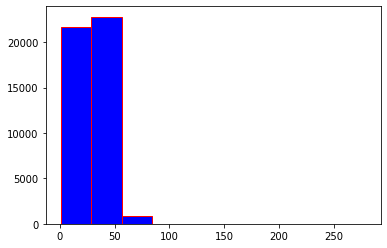

In [13]:
plt.hist(numeric_df['Age'],
         facecolor = 'blue',
         edgecolor = 'red',
         bins = 10)
plt.show

In [14]:
df['Hobbyist'].fillna('none', inplace = True)
px.histogram(df, 
             x='Age',
             title='Age vs. Hobbyist', 
             color='Hobbyist' )

In [15]:
df.head(1)

Respondent                      MainBranch Hobbyist  Age Age1stCode  \
0           1  I am a developer by profession      Yes  NaN         13   

  CompFreq  CompTotal  ConvertedComp  Country   CurrencyDesc CurrencySymbol  \
0  Monthly        NaN            NaN  Germany  European Euro            EUR   

  DatabaseDesireNextYear                         DatabaseWorkedWith  \
0   Microsoft SQL Server  Elasticsearch;Microsoft SQL Server;Oracle   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   

                      Ethnicity Gender  \
0  White or of European descent    Man   

                                          JobFactors              JobSat  \
0  Languages, frameworks, and other technologies ...  Slightly satisfied   

                                        JobSeek  LanguageDesireNextYear  \
0  I am not interested in new job opportunities  C#;HTML/CSS;JavaScript   

       LanguageWorkedWith MiscTechDesireNextYear MiscTechWorkedWith  \
0  C#;HTML/CSS;JavaScript      .NET Core;Xamarin     .NET;.NET Core   

             NEWCollabToolsDesireNextYear  \
0  Microsoft Teams;Microsoft Azure;Trello   

                       NEWCollabToolsWorkedWith NEWDevOps       NEWDevOpsImpt  \
0  Confluence;Jira;Slack;Microsoft Azure;Trello        No  Somewhat important   

          NEWEdImpt NEWJobHunt NEWJobHuntResearch     NEWLearn NEWOffTopic  \
0  Fairly important        NaN                NaN  Once a year    Not sure   

  NEWOnboardGood NEWOtherComms                       NEWOvertime  \
0            NaN            No  Often: 1-2 days per week or more   

                                 NEWPurchaseResearch NEWPurpleLink  \
0  Start a free trial;Ask developers I know/work ...        Amused   

                                         NEWSOSites  \
0  Stack Overflow (public Q&A for anyone who codes)   

                                            NEWStuck    OpSys  \
0  Visit Stack Overflow;Go for a walk or other ph...  Windows   

            OrgSize                          PlatformDesireNextYear  \
0  2 to 9 employees  Android;iOS;Kubernetes;Microsoft Azure;Windows   

  PlatformWorkedWith PurchaseWhat                Sexuality SOAccount  \
0            Windows          NaN  Straight / Heterosexual        No   

           SOComm SOPartFreq             SOVisitFreq  \
0  No, not at all        NaN  Multiple times per day   

                   SurveyEase           SurveyLength Trans  \
0  Neither easy nor difficult  Appropriate in length    No   

                                      UndergradMajor WebframeDesireNextYear  \
0  Computer science, computer engineering, or sof...           ASP.NET Core   

     WebframeWorkedWith                            WelcomeChange  WorkWeekHrs  \
0  ASP.NET;ASP.NET Core  Just as welcome now as I felt last year         50.0   

  YearsCode YearsCodePro  
0        36           27

In [23]:
df['JobSat'].nunique()

5

In [17]:
df['CompFreq'].fillna('none', inplace = True)
px.histogram(df, 
             x='Age',
             title='Age vs. CompFreq', 
             color='CompFreq')

In [18]:
df['NEWDevOps'].fillna('none', inplace = True)
px.histogram(df, 
             x='Age',
             title='Age vs. NEWDevOps', 
             color='NEWDevOps')

In [19]:
df['OpSys'].fillna('none', inplace = True)
px.histogram(df, 
             x='Age',
             title='Age vs. OpSys', 
             color='OpSys')

In [20]:
px.histogram(df, x='Country', title='Country vs. OpSys', color='OpSys')

In [22]:
df['CompFreq'].fillna('none', inplace = True)
px.histogram(df, x='Country', title='Country vs. Compfreq', color='CompFreq')

In [24]:
df['JobSat'].fillna('none', inplace = True)
px.histogram(df, x='Country', title='Country vs. JobSat', color='JobSat')

In [25]:
px.histogram(df, x='Age', title='Age vs. JobSat', color='JobSat')

In [32]:
px.scatter(df.sample(2000), 
           title='YearsCode. vs WorkWeekHrs',
           x='YearsCode', 
           y='WorkWeekHrs', 
           color='JobSat')